
## **Exploratory Data Analysis**



In [1]:
# Load libraries
import pandas as pd
import numpy
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

filename = 'Descripcion.csv' 
DataSet0 = pd.read_csv(filename)
DataSet0


,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1460,Presentacion Moodle,1.053860e+09,No definido,NaN,NaN,NaN,SIGMA Ingeniería S.A,SIGMA
1,TIK1005,Revision Presentacion Aliado de Negocio JEEP,2.434445e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
2,TIK1006,Se debe realizar la configuración de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
3,TIK1015,Análisis Calidad y verificaciones.,1.058818e+09,No definido,NaN,NaN,NR,Codensa,Geolumina
4,TIK7096,Capa predial Cartagena,2.434355e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
...,...,...,...,...,...,...,...,...,...
13601,TIK11085,BARRA HERRAMIENTAS PENDIENTE VEHICULO,1.053771e+09,1- Nuevo requerimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
13602,TIK11506,Generar nueva app de conductor de bioagricola,1.059712e+09,1- Nuevo requerimiento,NaN,NaN,NR,Bioagrícola del Llano,Geoaseo
13603,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
13604,TIK11509,Creación de un usuario de consulta para la Con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [5]:
# Data cleaning
PorBorrar1 = DataSet0[DataSet0['descripcion'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['nombre_cliente'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['Linea_Negocio'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

PorBorrar1 = DataSet0[DataSet0['categoria'] == '1- Nuevo requerimiento'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'] == 'No definido'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

In [6]:

print(DataSet0["categoria"].value_counts())
print(f' cantidad de categorias {len(DataSet0["categoria"].value_counts())}')

Cambiar estado de OT                      2233
Gestión de tickets de servicio            1425
Datos erróneos en reporte                 1103
Revisión de formularios                    680
Creación / inactivación de usuario         677
Configuración GPS                          518
Interrupción completa de servicio          383
Configuración de visor                     324
Capacitación de módulo o funcionalidad     304
No envia el backup de app móvil            284
Informes de reporte y mantenimiento        195
Creación de servicios                      115
Disminución de desempeño de plataforma      78
Name: categoria, dtype: int64
 cantidad de categorias 13


In [12]:
patterns_labels = ['Configuración GPS',
                    'Revisión de formularios',
                    'Auditoria del sistema / interrupción completa de servicio',
                    'Informes de reporte y mantenimiento',
                    'Configuración de visor',
                    'Creación / inactivación  de usuario',
                    'Datos erróneos en reporte / actualización de reportes',
                    'Disminución de desempeño de plataforma',
                    'Carga de datos masiva, gestión de tickets',
                    'No envia el backup de app móvil / no cargan datos en app',
                    'Cambiar datos por BD, Cambiar estado de OT',
                    'Capacitación de módulo o funcionalidad',
                    'Creación de servicios / publicación de servicios' ]
                   
                 

patterns_colors = ['indigo', 'tab:orange', 'maroon', 'tab:olive' , 'tab:brown' , 'lawngreen',
                  'tab:pink' ,'r', 'g', 'b', 'c' , 'm' , 'y'] # 'k' , '#6E2C00']


DataSet0 = DataSet0.drop(['tik_codigo','propietario', 'modulo', 'producto', 'ans'], axis=1)

In [8]:
# Summarize the Dataset

# shape
print('DataSet Shape: ', DataSet0.shape, '\n')
# print(DataSet0.shape)

# head
print('DataSet 20 first elements: \n', DataSet0.head(20) ,'\n')
# print(DataSet0.head(20))

# Statistical Summary

# descriptions
print('DataSet description: \n', DataSet0.describe() ,'\n')
# print(DataSet0.describe())

# Class Distribution
print('DataSet category distrubution: \n')
print(DataSet0.groupby('categoria').size())

DataSet Shape:  (8319, 4) 

DataSet 20 first elements: 
                                           descripcion  \
0   Se debe realizar la configuración de los servi...   
1                          Crear servicios Geoserver    
2                          Crear servicios Geoserver    
3   Construcción, mantenimiento y migración de la ...   
4                      publicación servicio Geoserver   
5   Por favor agregar un nuevo evento en el formul...   
6   Por favor actualizar el CT de la OT_7441 con l...   
7                          Crear servicios Geoserver    
8   Se requiere revisar la orden de trabajo OT_100...   
9   Crear clientes y contactos de los proveedores ...   
10    Realizar ajuste orden de servicio Veolia Cúcuta   
11                           Cronograma Area servicio   
12  Error en el Widget Add Data - CSV, sale error ...   
13  En la Operación de Veolia Valle, que cuenta co...   
14       Agregar el proyecto SE Mosquera en Geolumina   
15  Crear clientes y contactos 

 CATEGORÍAS: 
count                     8319
unique                      13
top       Cambiar estado de OT
freq                      2233
Name: categoria, dtype: object


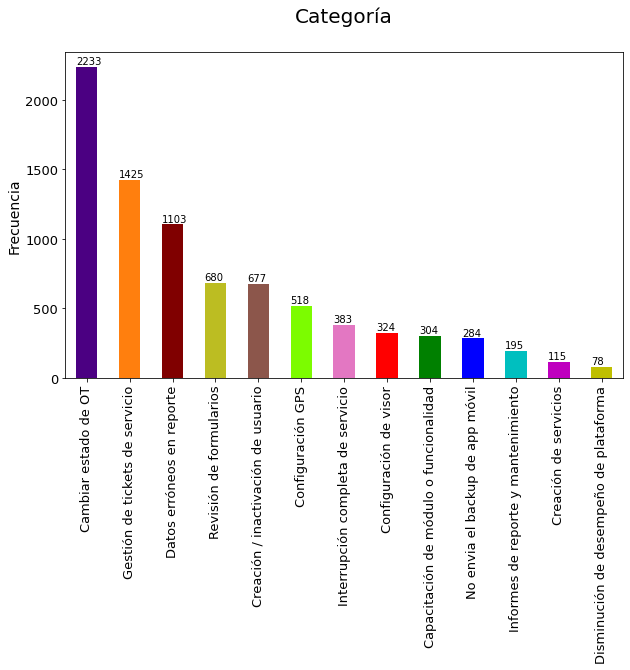

In [13]:
# Dataset distribution

print(" CATEGORÍAS: ")
ax = DataSet0['categoria'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color=patterns_colors)
ax.set_title('Categoría', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 20, str(round(i.get_height(), 2)), fontsize=10)
    
print(DataSet0['categoria'].describe())

 CLIENTES: 
count        8319
unique         26
top       Codensa
freq         2989
Name: nombre_cliente, dtype: object


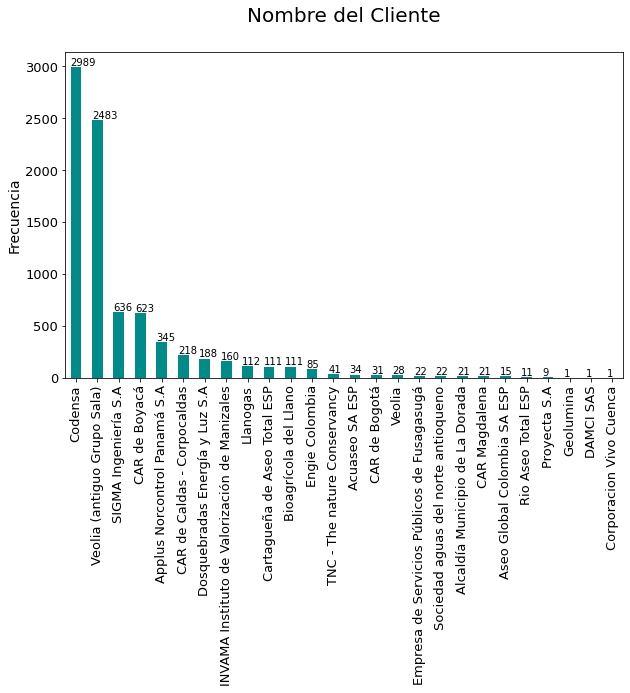

In [14]:

print(" CLIENTES: ")
ax = DataSet0['nombre_cliente'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='darkcyan')
ax.set_title('Nombre del Cliente', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 2)), fontsize=10)
    
print(DataSet0['nombre_cliente'].describe())

 LÍNEAS DE NEGOCIO: 
count          8319
unique            4
top       Geolumina
freq           3910
Name: Linea_Negocio, dtype: object


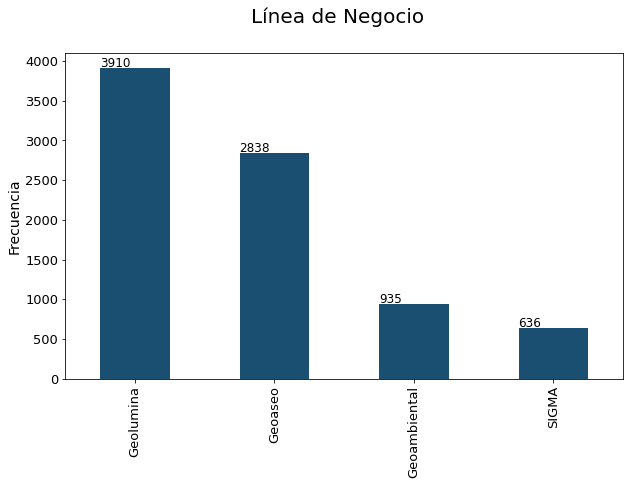

In [16]:
print(" LÍNEAS DE NEGOCIO: ")
ax = DataSet0['Linea_Negocio'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#1B4F72')
ax.set_title('Línea de Negocio  ', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 20, str(round(i.get_height(), 2)), fontsize=12)
    
print(DataSet0['Linea_Negocio'].describe())

In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()  

DatSetNum = DataSet0.drop(['categoria'], axis=1)

DatSetNum = DatSetNum.loc[:, ['descripcion','nombre_cliente','Linea_Negocio']] = \
DatSetNum = DatSetNum.loc[:,['descripcion','nombre_cliente','Linea_Negocio']].apply(enc.fit_transform)
DatSetNum.head()

,descripcion,nombre_cliente,Linea_Negocio
0,5171,9,1
1,2087,18,2
2,2087,18,2
3,1671,21,3
4,7349,18,2


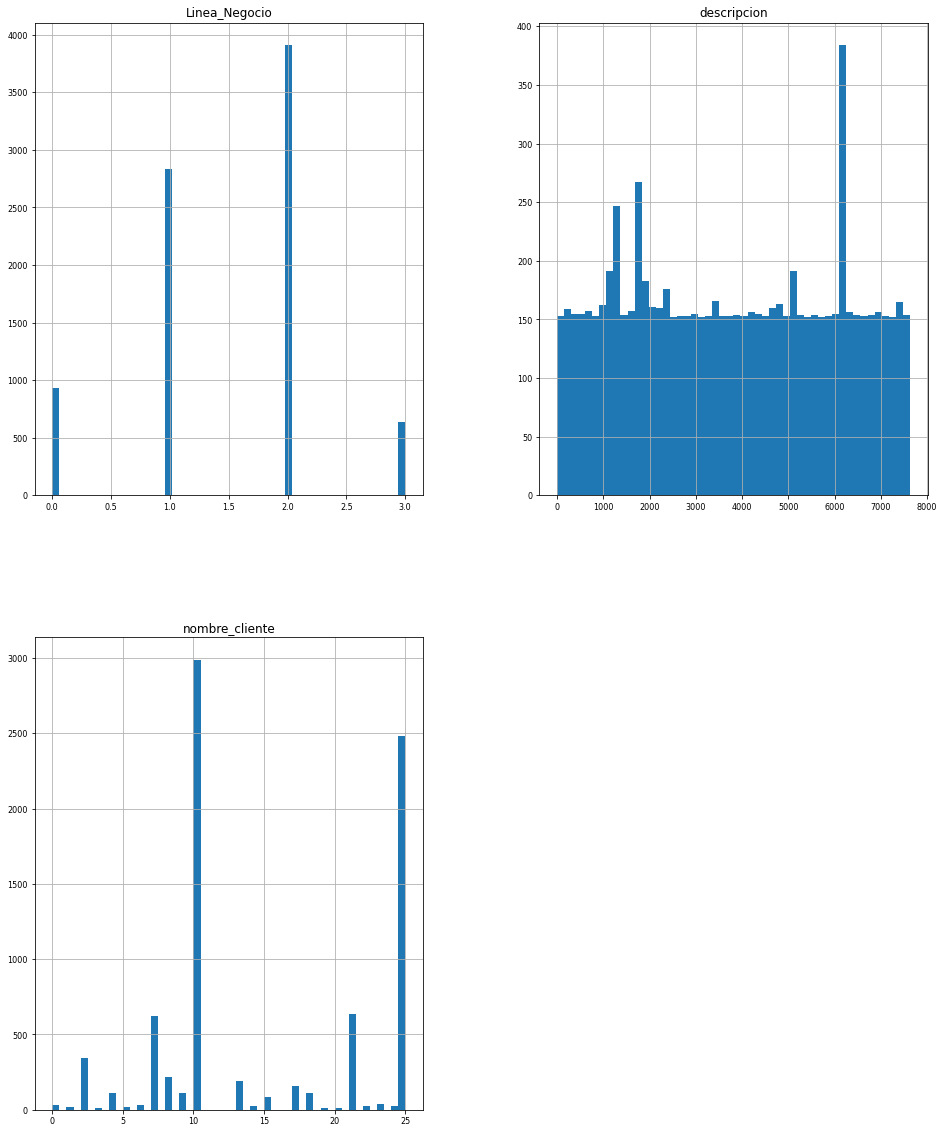

In [14]:
DatSetNum.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

There is 0 strongly correlated values with Linea_Negocio:
Series([], Name: Linea_Negocio, dtype: float64)


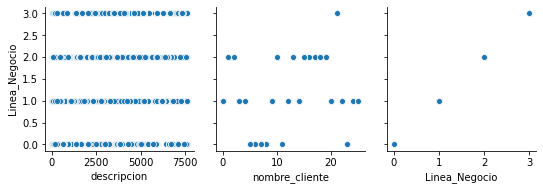

In [15]:
DatSetNum_corr = DatSetNum.corr()['Linea_Negocio'][:-1] 
golden_features_list = DatSetNum_corr[abs(DatSetNum_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Linea_Negocio:\n{}".format(len(golden_features_list), golden_features_list))

for i in range(0, len(DatSetNum.columns), 4):
    sns.pairplot(data=DatSetNum,
                x_vars=DatSetNum.columns[i:i+4],
                y_vars=['Linea_Negocio'])

In [16]:
import operator

individual_features_df = []
for i in range(0, len(DatSetNum.columns) - 1): 
    tmpDf = DatSetNum[[DatSetNum.columns[i], 'Linea_Negocio']]
    tmpDf = tmpDf[tmpDf[DatSetNum.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Linea_Negocio'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

 nombre_cliente: -0.11017785226023744
    descripcion: 0.023594433393547026


In [17]:
DatSetNum_corr = DatSetNum.corr()['nombre_cliente'][:-2] 
golden_features_list = DatSetNum_corr[abs(DatSetNum_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with nombre_cliente:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with nombre_cliente:
Series([], Name: nombre_cliente, dtype: float64)


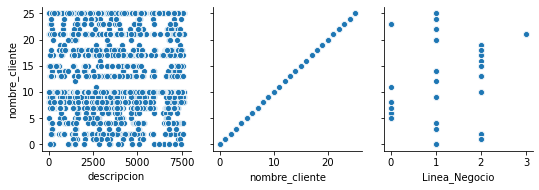

In [18]:
for i in range(0, len(DatSetNum.columns), 4):
    sns.pairplot(data=DatSetNum,
                x_vars=DatSetNum.columns[i:i+4],
                y_vars=['nombre_cliente'])

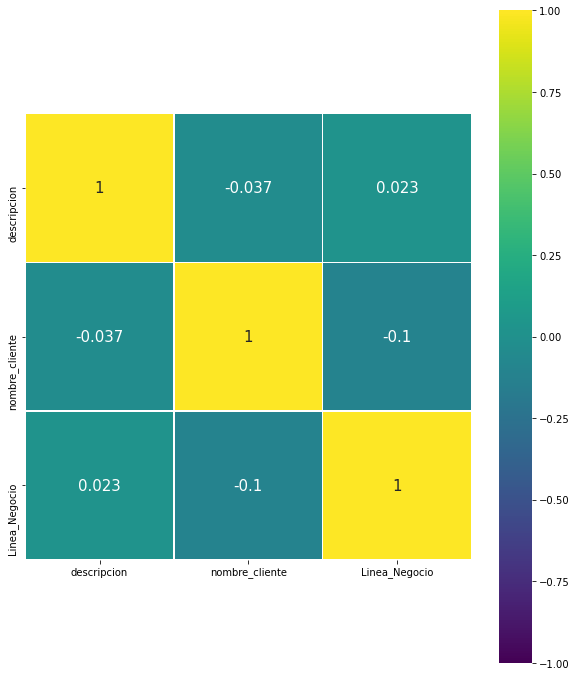

In [19]:
corr = DatSetNum.corr()
plt.figure(figsize=(10, 12))

sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 15}, square=True);

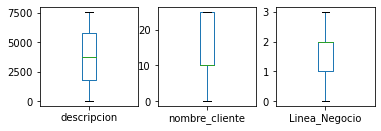

In [20]:
DatSetNum.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

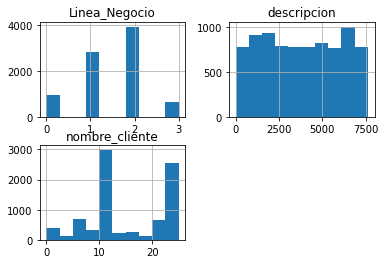

In [21]:
# histogramas
DatSetNum.hist()
plt.show()

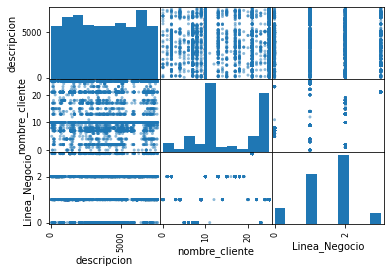

In [22]:
# scatter plot matrix
scatter_matrix(DatSetNum)
plt.show()